# Reference
- https://blog.amedama.jp/entry/lightgbm-cv-model
- https://www.kaggle.com/code/kenmatsu4/using-trained-booster-from-lightgbm-cv-w-callback/notebook

# Example 1: breast cancer

In [1]:
from sklearn import datasets
breast = datasets.load_breast_cancer()
X, y = breast.data, breast.target

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=0)

In [3]:
lgbm_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 64,
    'min_data_in_leaf': 10,
    'max_depth': 5,
    'verbose': 0,
}

In [4]:
from lightgbmcv import LightGbmCv
lcv = LightGbmCv()
lcv.cv(X_train, y_train, lgbm_params, n_folds=5)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [5]:
proba, label = lcv.get_oof(X_train, y_train, binary_threshold=0.5)

In [6]:
from sklearn.metrics import accuracy_score
print(f"precision on oof preds: {accuracy_score(y_train, label)}")

precision on oof preds: 0.9483568075117371


In [7]:
pred_proba, pred_label = lcv.predict(X_test, binary_threshold=0.5)

In [8]:
print(f"precision on oof preds: {accuracy_score(y_test, pred_label)}")

precision on oof preds: 0.9790209790209791


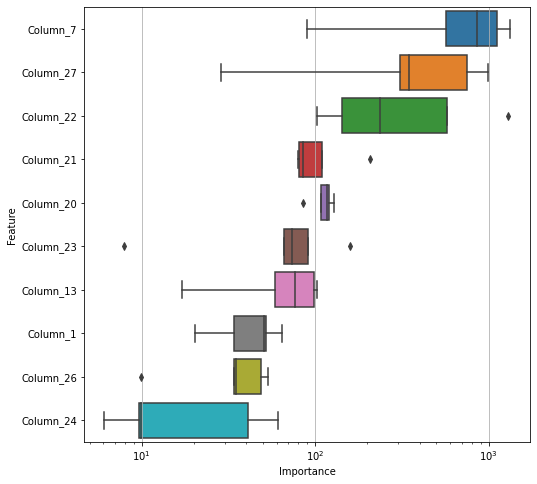

In [9]:
lcv.plot_feature_importance(plot_top_n=10)

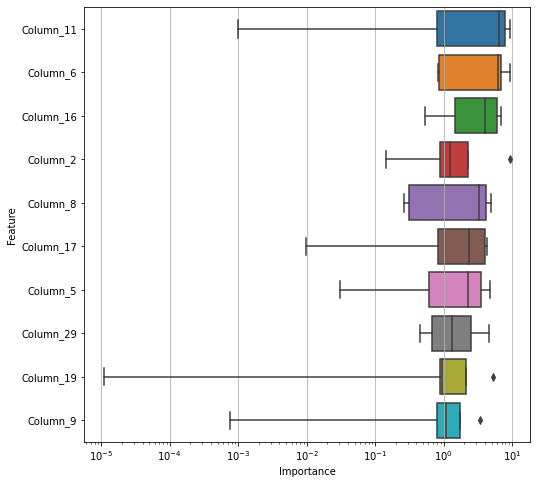

In [10]:
lcv.plot_feature_importance(plot_top_n=-10)

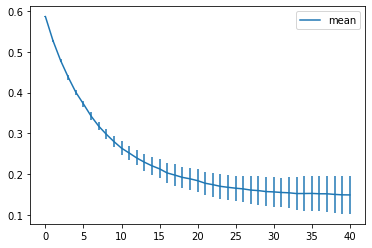

In [11]:
lcv.plot_train_logloss()

# Example 2: iris

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=0)

In [14]:
lgbm_params = {
    'objective': 'multiclass',
    'num_class': 3,
}

In [15]:
from lightgbmcv import LightGbmCv
lcv = LightGbmCv()
lcv.cv(X_train, y_train, lgbm_params, n_folds=5)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 89, number of used features: 4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 89, number of used features: 4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 90, number of used features: 4
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` t

In [16]:
proba, label = lcv.get_oof(X_train, y_train)

In [17]:
from sklearn.metrics import accuracy_score
print(f"precision on oof preds: {accuracy_score(y_train, label)}")

precision on oof preds: 0.9464285714285714


In [18]:
pred_proba, pred_label = lcv.predict(X_test)

In [19]:
print(f"precision on oof preds: {accuracy_score(y_test, pred_label)}")

precision on oof preds: 0.9473684210526315


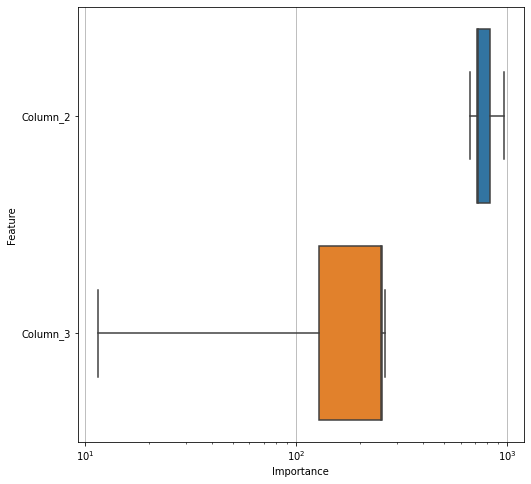

In [20]:
lcv.plot_feature_importance(plot_top_n=2)

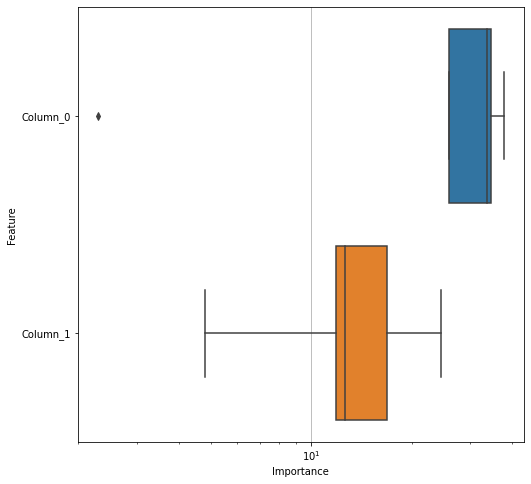

In [21]:
lcv.plot_feature_importance(plot_top_n=-2)

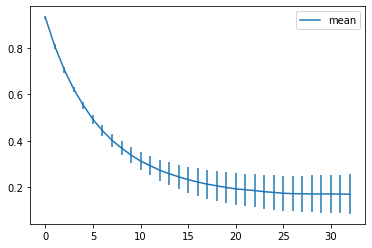

In [22]:
lcv.plot_train_logloss()